## Norms, $L^p$-spaces, condition numbers, least squares fitting, regularization

### Normed spaces, $L^p$ spaces

**Normed space**: a vector space $V$ equipped with a norm $\|\cdot\|:V\to \mathbb R_+$ such that
* $\|\lambda\mathbf v\|=|\lambda|\|\mathbf v\|$
* $\|\mathbf v+\mathbf u\|\le \|\mathbf v\|+\|\mathbf u\|$

**Measure space**:  a set $\Omega$ and a nonnegative function (measure) $\mu$ on some of its subsets (a $\sigma$-algebra) with the ($\sigma$-)additivity property: 

$$\mu(\sqcup_k A_k)=\sum_k \mu(A_k),$$

where $\sqcup$ is the union of non-overlapping sets.

Two important examples:
* **Probability space**: $\mu(\Omega)=1$
* **Discrete set with the counting measure**: $\Omega=\{\omega_1, \omega_2,\ldots\}$ such that $\mu(\{\omega_k\})=1$

**Functional spaces**: $V=\{f:\Omega\to\mathbb R\}$

* Random variables: functions on a probability space $\Omega$
* $\mathbb R^n$: functions on the discrete set $\Omega=\{\omega_1,\ldots,\omega_n\}$

**$L^p$ spaces**: functional spaces with the norm

$$\|f\|_p=\Big(\int_\Omega |f|^p d\mu\Big)^{1/p},$$

where $p\ge 1$.

Most widely used: $p=1,2,\infty$.

$p=\infty$ requires a separate definition:

$$\|f\|_\infty=\sup_x |f(x)|$$

**Exercise:** Why is this a natural definition? 

**$l^p$-norms on $\mathbb R^n$**: View $\mathbb R^n$ as functional space on $\Omega=\{\omega_1, \ldots, \omega_n\}$, then for any $\mathbf v=(v_1,\ldots,v_n)$

$$\|\mathbf v\|_p=\begin{cases}\big(\sum_{k=1}^n|v_k|^p\big)^{1/p}, & p < \infty \\ \max_k|v_k|,& p= \infty\end{cases}$$

**Exercise:** What are the two-dimensional balls with respect to the norms $\|\cdot\|_1$ and $\|\cdot\|_\infty$?

**Exercise$^*$** ("curse of dimensionality"): Let $A_n$ be the $\|\cdot\|_1$-ball in $\mathbb R^n$ centered at the origin and having the radius such that the volume of $A_n$ is 1. Similarly, let $B_n$ be the $\|\cdot\|_\infty$-ball in $\mathbb R^n$ centered at the origin and having the radius such that the volume of $B_n$ is 1. Show that at large $n$ 

$$\operatorname{Vol}(A_n\cap B_n)\sim e^{-an}$$

with some constant $a>0,$ and find this $a$. (*Hint*: large deviation theory)

In [2]:
import numpy as np
v = [0,1,2]
p = 1.5
print (np.linalg.norm(v,p))

2.4472608147714756


The case $p=2$ is special: the norm is obtained from the scalar product:

$$\|f\|_2=\sqrt{\langle f, f\rangle},$$

where 

$$\langle f, g\rangle = \int_\Omega fg d\mu$$

### Errors

Let $\mathbf y = (y_1, \ldots, y_N)$ be true values, and $\widetilde{\mathbf y} = (\mathbf y_1, \ldots, \mathbf y_N)$ be approximate values. 

The **absolute** error of representing vector $\mathbf y$ as $\widetilde{\mathbf y}$ is $\|\mathbf y-\widetilde{\mathbf y}\|$, where $\|\cdot\|$ is some norm in $\mathbb R^N$, e.g. an $l^p$-norm.

The **relative** error is $\frac{\|\mathbf y-\widetilde{\mathbf y}\|}{\|\mathbf y\|}$.

**Error metrics in statistical context:** If the values in $\mathbf y$ result from some repeated (random) experiments, one typically defines errors as $L^p$-norms with the probability measure $\mu(\omega_k)=\frac{1}{N}$:
* $L^1$-norm for Mean Absolute Error: $$\rm{MAE}=\frac{1}{N}\sum_{n=1}^N|y_n-\widetilde y_n|$$
* $L^2$-norm for Root-Mean-Squared Error: 
$$\rm{RMSE}=\sqrt{\frac{1}{N}\sum_{n=1}^N|y_n-\widetilde y_n|^2}$$
* $L^\infty$-norm for Maximum Error:
$$\rm{MaxE}=\max_{n}|y_n-\widetilde y_n|$$

**Exercise:** Which is the biggest: MAE, RMSE, or MaxE? Which is the smallest?

**Statistical relative errors**: E.g., relative RMSE:

$$\rm{RRMSE}=\frac{\sqrt{\frac{1}{N}\sum_{n=1}^N|y_n-\widetilde y_n|^2}}{\sqrt{\frac{1}{N}\sum_{n=1}^N|y_n-\langle y\rangle|^2}},$$

where $\langle y\rangle = \frac{1}{N}\sum_n y_n.$ 
* $\mathrm{RRMSE}^2$ is the "fraction of *unexplained* variance"
* $R^2=1-\mathrm{RRMSE}^2$ is the "fraction of *explained* variance", a.k.a. *coefficient of determination*

### Matrix norm

Given a vector norm $\|\cdot\|$ on $\mathbb R^n$, the corresponding matrix norm is defined by 

$$\|A\|=\sup_{\mathbf v}\frac{\|A\mathbf v\|}{\|\mathbf v\|}$$

**Exercise:** For a matrix $A=(A_{nm})$, prove that:
* $\|A\|_\infty = \max_m \sum_{n}|A_{mn}|$
* $\|A\|_1 = \max_n \sum_{m}|A_{mn}|$
* $\|A\|_2\le\sqrt{\|A\|_1\|A\|_\infty}$

**Exercise:** For any matrix norm $\|A\|$:
* $\|\mathrm{Id}\|=1$
* $\|AB\|\le \|A\|\|B\|$

**Exercise:** Frobenius norm $\|A\|_F=\sqrt{\sum_{mn}A_{mn}^2}$ of a matrix is **not** a matrix norm.

**Exercise:** Let $A$ be a symmetric matrix, then $\|A\|_2=\max_n |\lambda_n(A)|$, where $\lambda_n(A)$ are eigenvalues of $A$.

**Exercise:** For a general matrix $A$, $\|A\|_2=\max_n \lambda_n(A)$, where $\lambda_n(A)$ are singular values of $A$:

$$A=U\Lambda V^t,\quad UU^t=VV^t=\mathrm{Id}, \quad\Lambda=\operatorname{diag}(\lambda_1,\ldots,\lambda_n),\quad \lambda_k\ge 0$$

### Matrix condition number

Consider a linear system of equations $$A\mathbf x = \mathbf b,$$

with $A\in \mathbb R^{n\times n}$ and $\mathbf x, \mathbf b\in\mathbb R^n$. Suppose that we are solving the perturbed equation:

$$A(\mathbf x+\Delta \mathbf x)=\mathbf b +\Delta\mathbf b$$

**Exercise:** Show that $$\frac{\|\Delta \mathbf x\|}{\|\mathbf x\|}\le \kappa(A)\frac{\|\Delta\mathbf b\|}{\|\mathbf b\|},$$

where $\kappa(A)$ is **condition number**:

$$\kappa(A)=\|A\|\cdot\|A^{-1}\|$$


**Exercise:** Show that $\kappa(A)\ge 1$. When is $\kappa(A)= 1$?

**Exercise:** If $\|\cdot\|$ is the $l^2$-norm and $A$ is symmetric and positive definite, then $$\kappa(A)=\frac{\lambda_{\max}(A)}{\lambda_{\min}(A)},$$

where $\lambda_\max, \lambda_\min$ are the maximal and the minimal eigenvalues, respectively. 

**Exercise:** If $\|\cdot\|$ is the $l^2$-norm and $A$ is arbitrary, then $$\kappa(A)=\sqrt{\frac{\lambda_{\max}(A^*A)}{\lambda_{\min}(A^*A)}}$$

In [8]:
A = [[0,1],[2,3]]
print (np.linalg.cond(A))

6.8541019662496865
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


**Exercise:** Let $A_q=\left(\begin{matrix}1 & q\\ 0 & 1\end{matrix}\right)$ with $q\in\mathbb R$. 
* For any $q$, find condition number $\kappa(A_q)$ with respect to the $l^2$-norm.
* Give an example of specific values of $q,\mathbf b, \Delta\mathbf b$ such that, when solving $A_q\mathbf x = \mathbf b$ and $A_q(\mathbf x+\Delta \mathbf x)=\mathbf b (\mathbf x+\Delta\mathbf x)$, we get 

$$\frac{\|\Delta \mathbf x\|}{\|\mathbf x\|}\ge 10^6\frac{\|\Delta\mathbf b\|}{\|\mathbf b\|}.$$


## Example: polynomial interpolation

Problem: reconstruct a degree-$(N-1)$ polynomial $p(t)=\sum_{n=0}^{N-1}c_nt^n$ by $N$ values.

For any $\mathbf t=(t_0,\ldots,t_{N-1})$, if $\mathbf c=(c_0,\ldots,c_{N-1}),$ then $\mathbf y=(p(t_0), \ldots, p(t_{N-1}))$

$$\mathbf y = A\mathbf c,$$

where $A_{m,n}=(t_m)^n.$

**Exercise:** If the values $t_m$ are distinct, then the matrix $(A_{m,n})_{m,n=0}^{N-1}$ is invertible (a *Vandermonde* matrix).

Coefficients: [0 1 2 3 4 5 6 7 8 9]


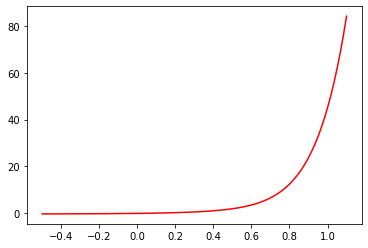

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

N = 10

# an example of vector of coefficients
coeffs = np.arange(N) 
print ('Coefficients:', coeffs)

def A(t):
    '''The matrix A giving the outputs, y = Ac, based on the values of t'''
    return np.array([t**k for k in range(N)]).T

# test points
t_test = np.linspace(-0.5,1.1,100)
A_test = A(t_test)
y_test = A_test.dot(coeffs)

plt.plot(t_test, y_test, '-r')
plt.show()

Take a random set of $N$ points $t_0,\ldots,t_{N-1}$, compute the corresponding $y$ values, and **round them** keeping $M$ decimal digits. After that, compute the coefficients.

Rounded values of y:
[ 1.309013  0.794331 30.535794 22.377689  1.444331  6.703439  2.991328
  0.404275  0.107139  8.606282]

Estimated coefficients:
[ 8.57622593e-04  9.76343100e-01  2.25388841e+00  1.55063657e+00
  8.95488496e+00 -5.65944058e+00  2.05615228e+01 -5.26141765e+00
  1.38044250e+01  7.81822609e+00]


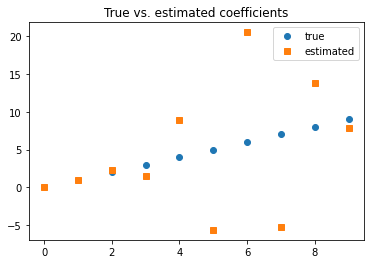


Max difference of values on test set:
1.248414236958506


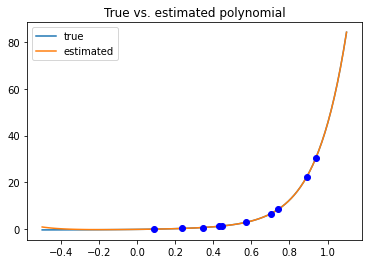

In [4]:
M = 6

t = np.random.rand(N,)
# t = np.linspace(0,1,N)

# true values
y = A(t).dot(coeffs)

# rounding
y_rounded = np.round(y, decimals=M)

print ('Rounded values of y:')
print (y_rounded)

coeffs_estimated = np.linalg.inv(A(t)).dot(y_rounded)
print ('\nEstimated coefficients:') 
print (coeffs_estimated)

plt.figure()
plt.plot(np.arange(N), coeffs, 'o', label='true')
plt.plot(np.arange(N), coeffs_estimated, 's', label='estimated')
plt.title('True vs. estimated coefficients')
plt.legend()
plt.show()

#compare on the test set
y_pred = A_test.dot(coeffs_estimated)

print ('\nMax difference of values on test set:' )
print (np.max(np.abs(y_pred-y_test)))

plt.figure()
plt.plot(t_test, y_test, label='true')
plt.plot(t_test, y_pred, label='estimated')
plt.plot(t, y, 'ob')
plt.title('True vs. estimated polynomial')
plt.legend()
plt.show()

**Exercise:** If $\min_{n\ne m}|t_n-t_m|\to 0$, then $\kappa(A)\to\infty$.

Check the minimum distance between $t_n$ and the condition number of $A$:

In [5]:
t_sorted = np.sort(t)
print ('Min distance between points t[n]:', np.min(t_sorted[1:]-t_sorted[:-1]))
print ('Condition number of A: %e' %np.linalg.cond(A(t)))

Min distance between points t[n]: 0.01703875080415229
Condition number of A: 4.537363e+08


## Least squares fitting, regularization
Consider a possibly *overdetermined* system of linear equation, i.e.  

$$A\mathbf x = \mathbf b,$$

where $\dim \mathbf x \le \dim\mathbf b$.

In this case the optimal $\mathbf x$ is usually determined by least squares fitting:

$$\|A{\mathbf x}-\mathbf{b}\|^2\to\min_{\mathbf x}$$

**Exercise:** The solution is given by 

$$\mathbf x = (A^tA)^{-1}A^t\mathbf b$$

What if $A^tA$ is degenerate or ill-conditioned? 

**Regularization**: consider instead the optimization problem

$$\|A{\mathbf x}-\mathbf{b}\|^2+\mu \|\mathbf x\|^2\to\min_{\mathbf x}$$

with some parameter $\mu>0$.

**Exercise:** The solution is given by 

$$\mathbf x = (A^tA+\mu)^{-1}A^t\mathbf b.$$

Show that $A^tA+\mu$ is better conditioned than $A^tA$.

The regularized formulation can be used for underdetermined as well as overdetermined systems.

**Exercise:** Show that the regularized solution is the most probable Bayesian estimator for $\mathbf x$ assuming the stochastic dependence $\mathbf y = A\mathbf x+\eta$ with $\eta\sim \mathcal N(0,\mathbf 1)$ and a normal prior  with covariance matrix $\frac{1}{\mu}\mathbf 1$.

## Example: a real world regression problem

Consider the data set 
https://archive.ics.uci.edu/ml/datasets/Relative+location+of+CT+slices+on+axial+axis

We want to construct a linear predictive model for the last column (Relative location of the image) using all previous columns except the ID (the first column). 

Download and extract the compressed dataset to the folder `CTslices_dir` as a `.csv` file:

In [6]:
from urllib.request import urlretrieve
import zipfile

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00206/slice_localization_data.zip'
urlretrieve(url, 'CTslices')
print ('downloaded OK')

zip_ref = zipfile.ZipFile('CTslices', 'r')
zip_ref.extractall('CTslices_dir')
zip_ref.close()
print ('extracted OK')

KeyboardInterrupt: 

Import and preprocess the data:

In [8]:
data = np.loadtxt('slice_localization_data.csv', skiprows=1, delimiter=',')
print ('Total rows:', data.shape[0])
print ('Total columns:', data.shape[1])

N = len(data)
A = data[:,:-1] # input values
A[:,0] = 1 # remove the ID column, insert constants instead
b = data[:,-1] # output values

Total rows: 53500
Total columns: 386


We want to demonstrate that a reasonably accurate linear model may be constructed using a small part of data, so we randomly divide the total set into a small training set and the remaining test set.

In [9]:
Ntrain = 1000

inds = np.random.permutation(N)

train = inds[:Ntrain]
test = inds[Ntrain:]
Atrain = A[train]
btrain = b[train]
Atest = A[test]
btest = b[test]

In [11]:
inds

array([28372, 12840, 12637, ..., 48827, 28110, 17181])

We will use the training data to estimate the regression coefficients:

$$\widetilde{\mathbf c}= (A^t_{\mathrm train}A_{\mathrm train}+\mu)^{-1}A_{\mathrm train}^t\mathbf b_{\mathrm train}$$

Then, we can use the estimated coefficients to make prediction on the test data:

$$\mathbf b_{\mathrm pred}=A_{\mathrm test}\widetilde{\mathbf c}$$

Let us check the eigenvalues of the matrix $A_{\mathrm train}^tA_{\mathrm train}:$

Condition number: 1.1350080262350457e+23
Smallest eigenvalue: -3.9198997465105533e-14
Highest eigenvalue: 20009.20030029909


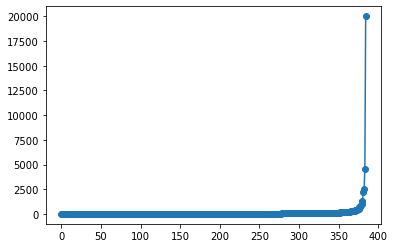

In [12]:
Q = Atrain.T.dot(Atrain)
eig, V = np.linalg.eigh(Q)
print ('Condition number:', np.linalg.cond(Q))
print ('Smallest eigenvalue:', np.min(eig))
print ('Highest eigenvalue:', np.max(eig))

plt.plot(eig,'-o')
plt.show()

To remove degeneracy, we add regularization; the amount of regularization can vary.

In [ ]:
mu1 = 1e-4
mu2 = 1e-8

y1 = Atrain.T.dot(btrain)
coeffs1 = np.linalg.inv(Q+mu1*np.eye(Atrain.shape[1])).dot(y1)
coeffs2 = np.linalg.inv(Q+mu2*np.eye(Atrain.shape[1])).dot(y1)

Compute the RRMSE prediction error on the test set.

In [ ]:
def getRRMSE(btest, bpred):
    return np.linalg.norm(bpred-btest)/np.linalg.norm(btest-np.mean(btest))

bpred1 = Atest.dot(coeffs1)
bpred2 = Atest.dot(coeffs2)

print ('RRMS error for prediction 1:', getRRMSE(btest, bpred1))
print ('RRMS error for prediction 2:', getRRMSE(btest, bpred2))

Compare with standard implementations of regression: 

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression as LR

    
model = Ridge()
model.fit(Atrain, btrain)
bpred_ridge = model.predict(Atest)
print ('RRMS error for Ridge model:', getRRMSE(btest, bpred_ridge))

model = LR()
model.fit(Atrain, btrain)
bpred_lr = model.predict(Atest)
print ('RRMS error for LR model:', getRRMSE(btest, bpred_lr))